In [ ]:
!pip3 install yfinance

In [12]:
# importar as bibliotecas necessárias
import pandas as pd
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import yfinance as yf

In [13]:
def stockData(stock_name, start_date, end_date=date.today(), country='US'):
    """
        This function return a dataframe with the price of the stock
        since the start_date until the end_date.
    """
    stock = stock_name
    if(country == 'BR'):
        stock = stock_name + '.SA'
    df = pd.DataFrame()
    # import data to data frame
    df = yf.download(stock, start=start_date, end=end_date)
    return df 

### Importando uma ação Brasileira





Criei uma função chamada stockData em que retorna um dataFrame com os dados da stock deseja, note que por se tratar da API do Yahoo FInance temos que adicionar ".SA" ao final de cada ticker brasileiro. Assim, para as stocks americanas, vc pode colocar automaticamente o ticker desejado. 

In [14]:
df = stockData("ITUB4", start_date='2020-01-03', end_date='2021-03-31', country='BR')
print(df.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close      Volume
Date                                                                         
2020-01-02        NaN        NaN        NaN        NaN        NaN         NaN
2020-01-03  37.500000  38.240002  37.450001  37.630001  36.285545  24891400.0
2020-01-06  37.549999  37.580002  36.910000  37.070000  35.745567  22294700.0
2020-01-07  37.070000  37.240002  36.209999  36.209999  34.916294  20000900.0
2020-01-08  36.450001  36.810001  35.619999  35.619999  34.347374  25980900.0


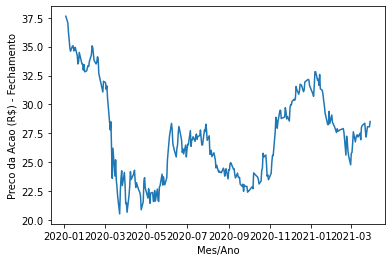

In [15]:
figure = plt.plot(df["Close"])
plt.xlabel('Mes/Ano')
plt.ylabel('Preco da Acao (R$) - Fechamento')
plt.show()

### Importando ação da bolsa americana

In [16]:
df2 = stockData("TER", start_date='2020-01-03', end_date='2021-04-01')

[*********************100%***********************]  1 of 1 completed


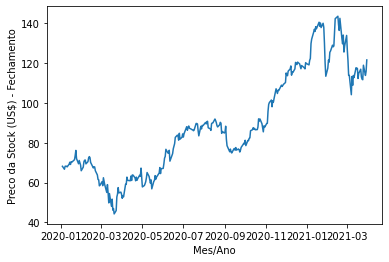

In [17]:
figure = plt.plot(df2["Close"])
plt.xlabel('Mes/Ano')
plt.ylabel('Preco da Stock (US$) - Fechamento')
plt.show()

### Calculando a correlação entre ativos

In [27]:
def stockCorrelation(stock_list, start_date, end_date, country='US'):
    """
        This function returns the correlation index between stock1 and stock2 
        during the time interval START_DATE to END_DATE
    """
    stock_collection = {}
    df = pd.DataFrame()
    for stock in stock_list:
        data = stockData(stock, start_date, end_date, country=country)
        stock_collection[stock] = data['Close']
    df = pd.DataFrame(stock_collection,columns=stock_list)
    print(df)
    corrMatrix = df.corr()
    mask = np.triu(np.ones_like(corrMatrix, dtype=np.bool))
    sn.heatmap(corrMatrix, mask=mask, annot=True)
    plt.title('Correlacao entre os ativos')
    plt.show()
    # RETURN CORRELATION MATRIX, PLOT DIAGONAL MATRIX
    return corrMatrix 

In [29]:
bancoes = ['BBAS3', 'ITUB4', 'BBDC3', 'SANB11', 'BPAC11']

#### Correlação entre "bancões" brasileiros

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                BBAS3      ITUB4      BBDC3     SANB11     BPAC11
Date                                                             
2020-01-02        NaN        NaN        NaN        NaN        NaN
2020-01-03  53.709999  37.630001  31.700001  51.009998  76.029999
2020-01-06  53.000000  37.070000  31.518181  47.509998  75.919998
2020-01-07  52.599998  36.209999  30.981817  47.410000  75.599998
2020-01-08  52.119999  35.619999  30.509090  47.040001  74.930000
...               ...        ...        ...        ...        ...
2021-03-25  29.559999  27.650000  23.070000  39.639999  92.779999
2021-03-26  29.660000  28.070000  23.260000  40.939999  91.76

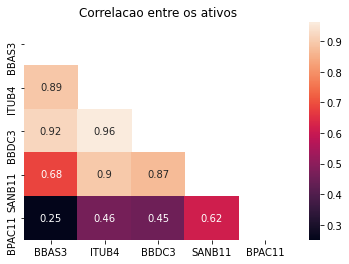

,BBAS3,ITUB4,BBDC3,SANB11,BPAC11
BBAS3,1.000000,0.894137,0.922351,0.684141,0.250796
ITUB4,0.894137,1.000000,0.961614,0.897339,0.464402
BBDC3,0.922351,0.961614,1.000000,0.871337,0.452982
SANB11,0.684141,0.897339,0.871337,1.000000,0.615812
BPAC11,0.250796,0.464402,0.452982,0.615812,1.000000


In [30]:
stockCorrelation(bancoes,'2020-01-03', '2021-04-01', country='BR')

#### Correlação entre big techs americanas

In [31]:
bigtechs = ['FB', 'AAPL', 'MSFT', 'GOOGL']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                    FB        AAPL        MSFT        GOOGL
Date                                                       
2020-01-03  208.669998   74.357498  158.619995  1361.520020
2020-01-06  212.600006   74.949997  159.029999  1397.810059
2020-01-07  213.059998   74.597504  157.580002  1395.109985
2020-01-08  215.220001   75.797501  160.089996  1405.040039
2020-01-09  218.300003   77.407501  162.089996  1419.790039
...                ...         ...         ...          ...
2021-03-25  278.739990  120.589996  232.339996  2032.459961
2021-03-26  283.019989  121.209999  236.479996  2024.729980
2021-03-29  290.820007  121.389999  235.240005  2045.790039
2021-03-30  288.000000  119.900002  231.850006  2046.469971
2021

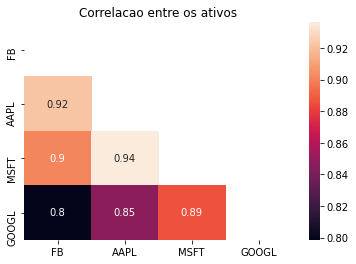

,FB,AAPL,MSFT,GOOGL
FB,1.000000,0.921747,0.901742,0.798591
AAPL,0.921747,1.000000,0.936265,0.847275
MSFT,0.901742,0.936265,1.000000,0.886417
GOOGL,0.798591,0.847275,0.886417,1.000000


In [32]:
stockCorrelation(bigtechs,'2020-01-03', '2021-04-01', country='US')